# Statistiques Appliquées - Séries temporelles

In [329]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose


warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

In [324]:
os.chdir("/Users/admin/Desktop/ENSAE/2A/StatApp/Données")
data_diff = pd.read_csv("Bases de données/DataDiff.csv", parse_dates=["DATE"],index_col="DATE")
data = pd.read_csv("Fed/DataFinal.csv", parse_dates=["DATE"],index_col="DATE")

In [325]:
data_diff = data_diff[["CSUSHPINSA_diff","EXPGSC1_diff","GDP_diff","GDPC1_diff","INDPRO_diff","ISRATIO_diff","LREM25TTUSM156S_diff","PCE_diff","PERMIT_diff","TTLCONS_diff","PX_LAST_diff","PX_LAST_2_diff"]]

In [347]:
liste_variables_diff = dict()
liste_variables = dict()

titre_variables = ["S&P/Case-Shiller U.S. National Home Price Index",
                   "Real Exports of Goods and Services",
                   "Gross Domestic Product",
                   "Real Gross Domestic Product",
                   "Industrial Production Index",
                   "Total Business: Inventories to Sales Ratio",
                   "Employment Rate: Aged 25-54: All Persons for the United States",
                   "Personal Consumption Expenditures",
                   "New Private Housing Units Authorized by Building Permits",
                   "Total Construction Spending",
                   "ISM Manufacturing PMI SA",
                   "ISM Non-Manufacturing NMI"]

In [349]:
for variable in data_diff.columns:

    i = list(data_diff.columns).index(variable)
    liste_variables_diff[variable] = titre_variables[i]
    
for variable in data.columns:

    i = list(data.columns).index(variable)
    liste_variables[variable] = titre_variables[i]
    

## Plot des series

#### Données non différenciées

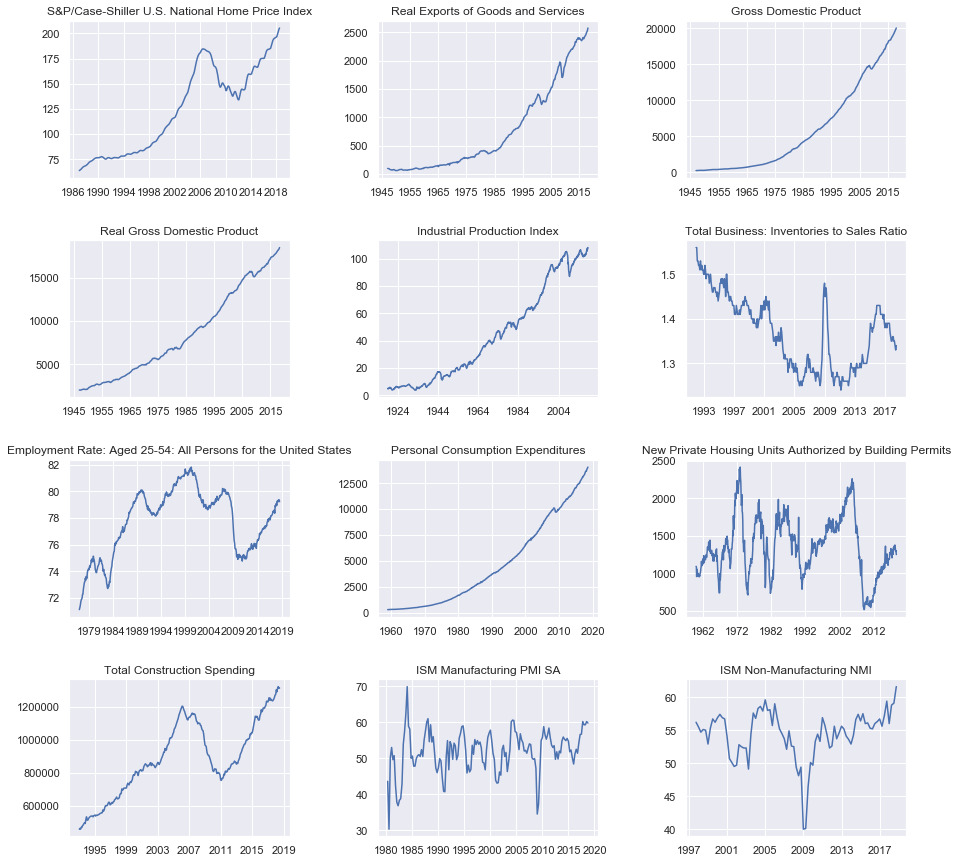

In [64]:
titre_variables = ["S&P/Case-Shiller U.S. National Home Price Index",
                   "Real Exports of Goods and Services",
                   "Gross Domestic Product",
                   "Real Gross Domestic Product",
                   "Industrial Production Index",
                   "Total Business: Inventories to Sales Ratio",
                   "Employment Rate: Aged 25-54: All Persons for the United States",
                   "Personal Consumption Expenditures",
                   "New Private Housing Units Authorized by Building Permits",
                   "Total Construction Spending",
                   "ISM Manufacturing PMI SA",
                   "ISM Non-Manufacturing NMI"]

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(0,data.shape[1]):
    
    X = data.iloc[:,i].dropna()
    ax = fig.add_subplot(4, 3, i+1)
    ax.plot(X)
    ax.set(title=titre_variables[i])

#### Données en rendement

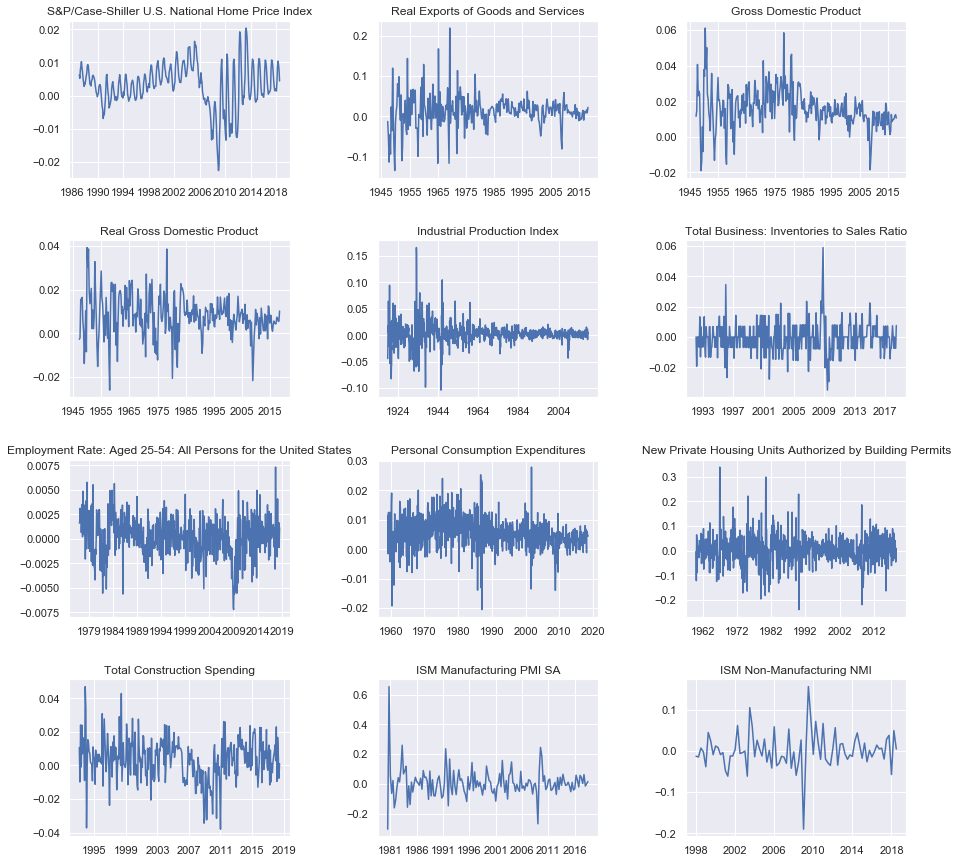

In [66]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(0,data.shape[1]):
    
    X = data_diff.iloc[:,i].dropna()
    ax = fig.add_subplot(4, 3, i+1)
    ax.plot(X)
    ax.set(title=titre_variables[i])

## Fonctions d'autocorrélogrammes (totaux et partiels)

#### Données non différenciées

* Autocorrélogrammes totaux

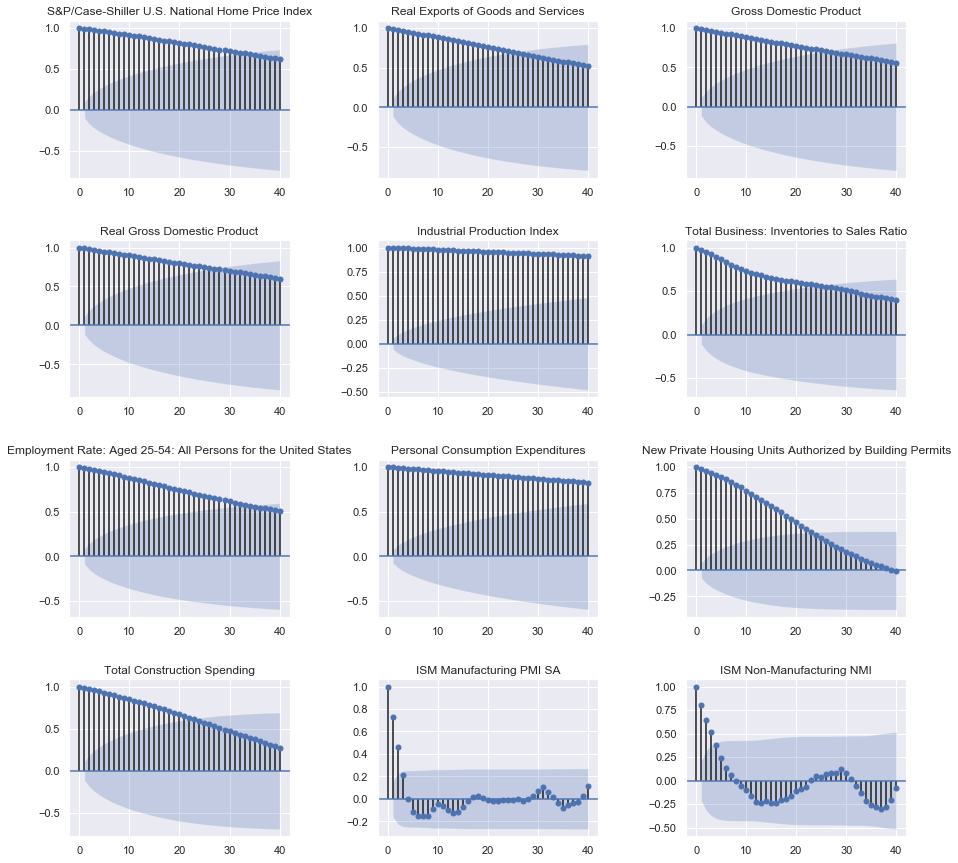

In [68]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(0,data.shape[1]):
    
    ax1 = fig.add_subplot(4,3,i+1)
    fig = plot_acf(data.iloc[:,i].dropna(how="any").values, lags=40, title=titre_variables[i], ax=ax1)

**Commentaires:** Décroissance très lente des autocorrélogrammes (à l'exception des deux dernières variables) => présence d'une racine unitaire. Pour PX_LAST et PX_LAST_2, saisonnalité ?

* Autocorrélogrammes partiels

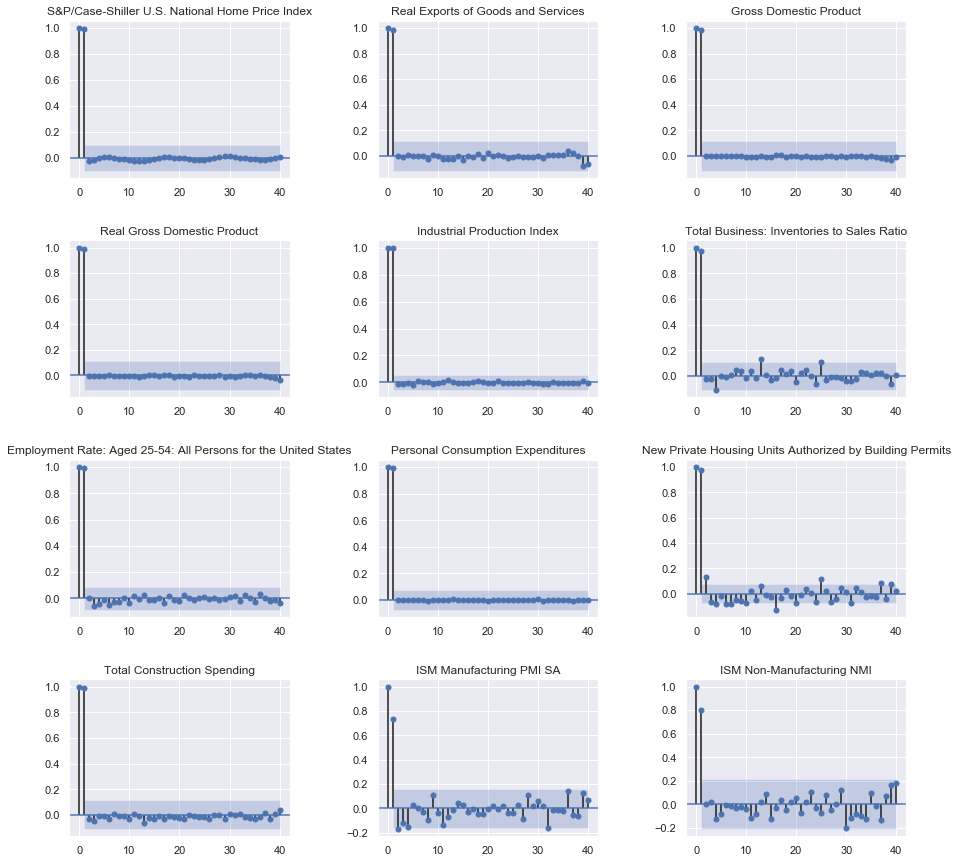

In [69]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(0,data.shape[1]):
    
    ax1 = fig.add_subplot(4,3,i+1)
    fig = plot_pacf(data.iloc[:,i].dropna(how="any").values, lags=40, title=titre_variables[i], ax=ax1)

**Commentaires:** Composante AR(1) (voire AR(2)) pour toutes les variables explicatives. Pour toutes les variables, sauf les deux dernières, l'autocorrélation partielle d'ordre 1 est très proche de 1 (valide l'intuition d'une racine unitaire?).

** Données différenciées **

In [368]:
# Mettre les données en rendement

# On crée d'abord des les colonnes des variables différenciées

data_diff_3 = pd.read_csv("Fed/DataFinal_monthly.csv", parse_dates=["DATE"],index_col="DATE")

Columns_diff = []

for variable in data_diff_3.columns:
    Columns_diff.append(variable+"_diff")
    data_diff_3[variable+"_diff"] = np.nan
    
# On crée X_diff = (X_{t} - X_{t-1})/(X_{t-1}) sur chaque colonne    
    
data_diff_3 = data_diff_3.copy(deep=True).iloc[:-2,:]  # On retire les deux dernières lignes qui faussent les résultats (problème sur certaines variables)
    
for irow in range(len(data_diff_3)-1):
    for jcol in range(12,data_diff_3.shape[1]):   
        data_diff_3.iloc[irow+1,jcol] = data_diff_3.iloc[irow+1,jcol-12] - data_diff_3.iloc[irow,jcol-12] # En 0 on n'aura pas la valeur différenciée
        
data_diff_3 = data_diff_3[Columns_diff]

data_diff_3.replace([np.inf, -np.inf], np.nan, inplace=True)

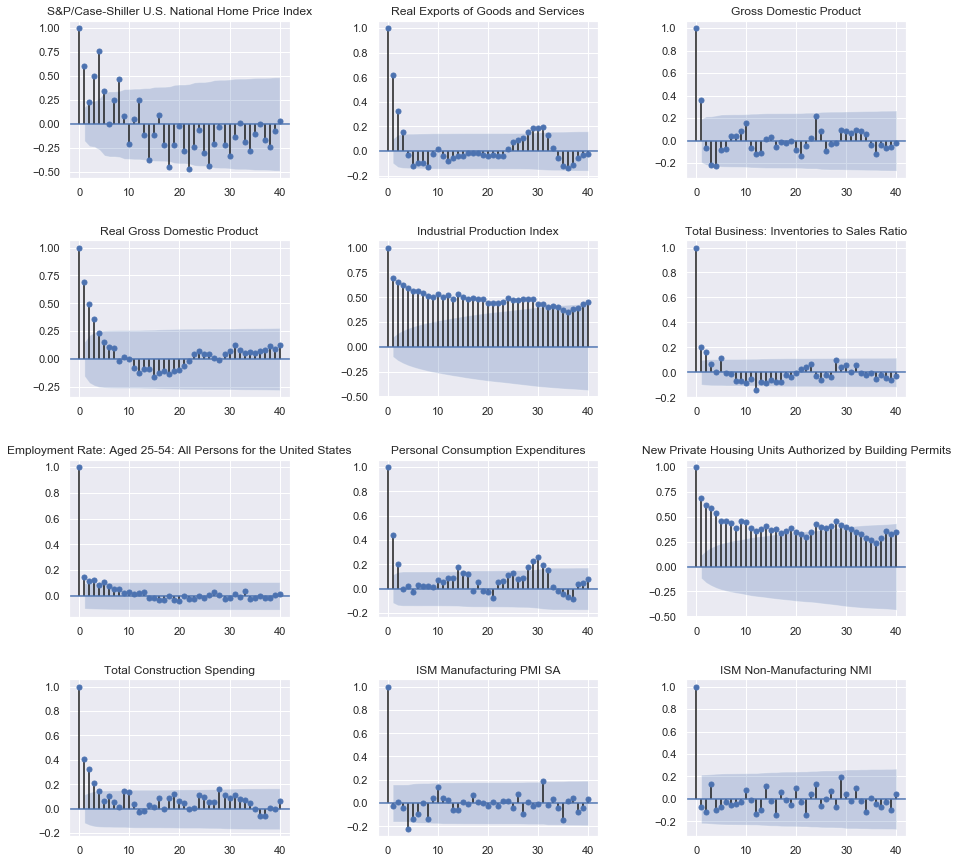

In [370]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(0,data_diff_3.shape[1]):
    
    ax1 = fig.add_subplot(4,3,i+1)
    fig = plot_acf(data_diff_3.iloc[:,i].dropna().values, lags=40, title=titre_variables[i], ax=ax1)

#### Données en rendement

* Autocorrélogrammes totaux

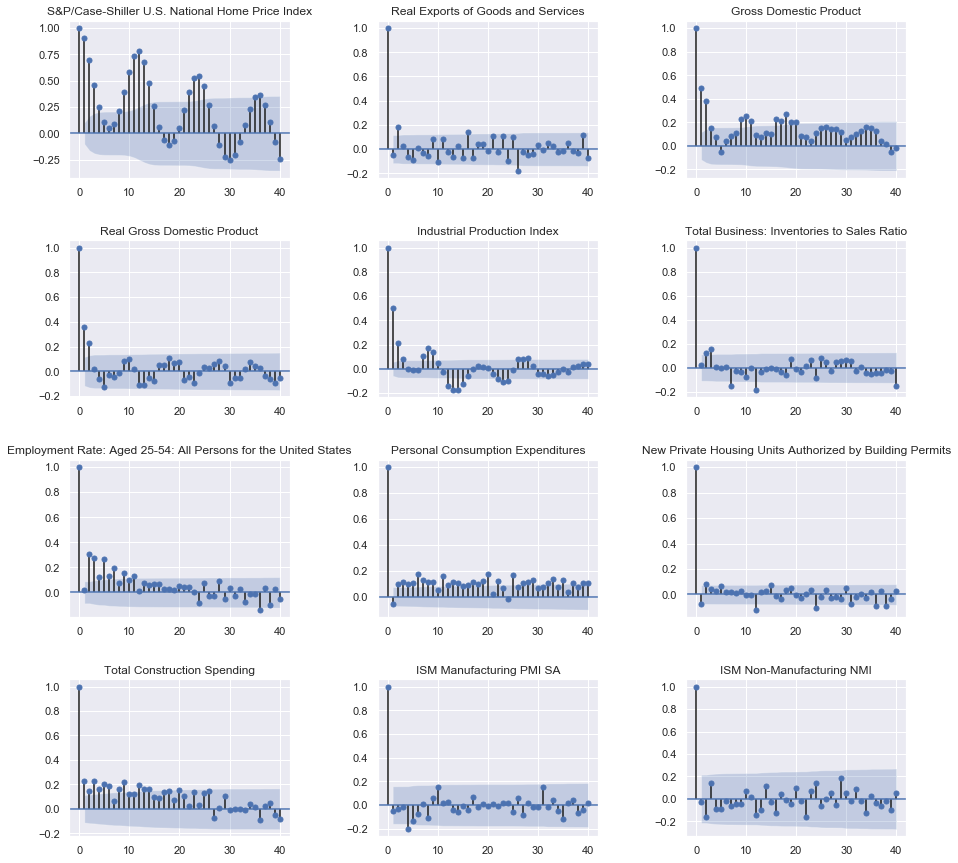

In [70]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(0,data_diff.shape[1]):
    
    ax1 = fig.add_subplot(4,3,i+1)
    fig = plot_acf(data_diff.iloc[:,i].dropna(how="any").values, lags=40, title=titre_variables[i], ax=ax1)

**Commentaires:** La première variable n'est clairement pas désaisonnalisée. Voir pour les autres?

* Autocorrélogrammes partiels

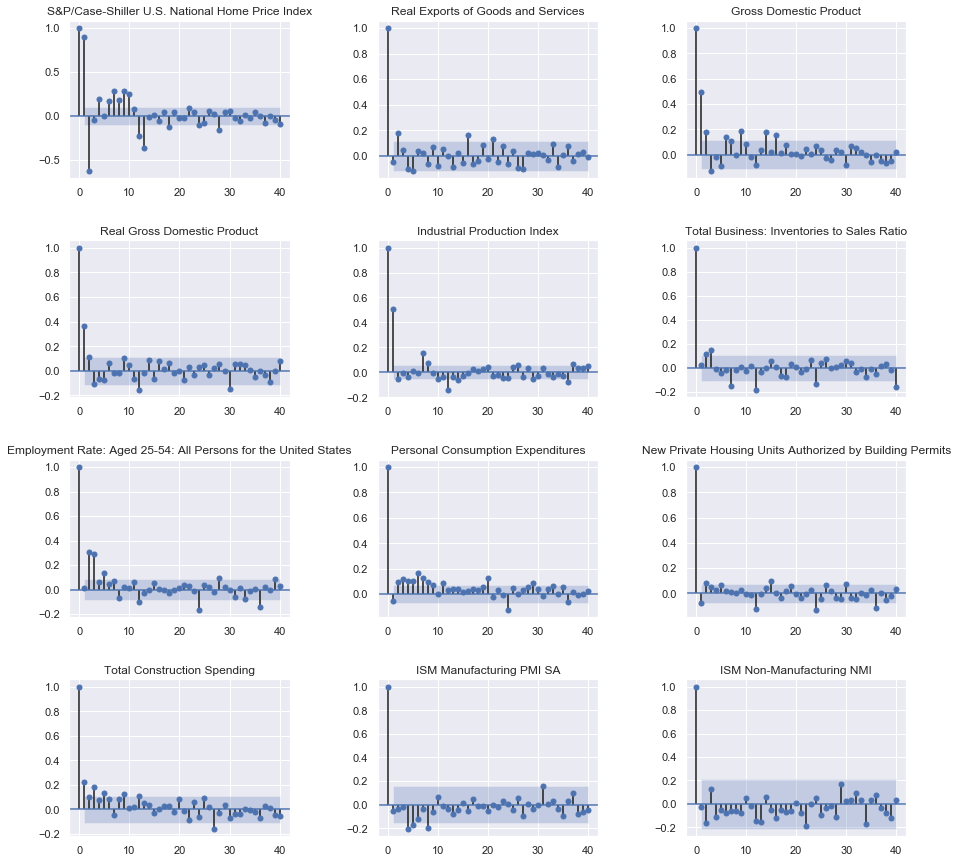

In [71]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(0,data_diff.shape[1]):
    
    ax1 = fig.add_subplot(4,3,i+1)
    fig = plot_pacf(data_diff.iloc[:,i].dropna(how="any").values, lags=40, title=titre_variables[i], ax=ax1)

## Tests de racine unitaire

### Explication du test de Dickey-Fuller simple :

On considère un modèle AR(1) simple : 
    
> $y_t = \rho y_{t-1} + u_t$

En prenant la différence première de $y_t$, on peut ré écrire le modèle de la façon suivante :

> $\Delta y_t = (\rho - 1) y_{t-1} + u_t = \delta y_{t-1} + u_t$

Tester la présence d'une racine unitaire ($\rho = 1$) revient à tester l'hypothèse : $\delta = 0$. La statistique $t = \frac{\hat{\delta}}{\sigma_\hat{\delta}}$ a une distribution spécifique qui correspond à la Dickey-Fuller table (auquel il faut se reférer si on veut trouver les valeurs critiques de notre test). Il y a trois versions du test selon la forme du modèle que l'on considère :

> 1. $\Delta y_t = \delta y_{t-1} + u_t$ (tester pour la présence d'une racine unitaire).
> 2. $\Delta y_t = a_0 + \delta y_{t-1} + u_t$ (racine unitaire avec dérive).
> 3. $\Delta y_t = a_0 + a_1 t + \delta y_{t-1} + u_t$ (racine unitaire avec trend et dérive).

### Augmented Dickey-Fuller test

Le test Dickey-Fuller augmenté est une version plus compliquée du test de Dickey-Fuller où l'on considère le modèle suivant :

> $\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + ... + \delta_{p-1} \Delta y_{t-p+1} + \epsilon_t$

Où $p$ correspond au nombre de retard du processus autorégressif (calculé automatiquement par le test, sûrement en backward induction mais je ne suis pas sûre).

On fait également le test pour plusieurs spécificités du modèle comme pour le test de Dickey-Fuller simple (si on pense que la série inclut une constante ou non, une constante et un trend, etc.). 

Les hypothèses du test sont les suivantes 

> $H_{0} : \gamma = 0$ (présence d'une racine unitaire, la série n'est pas stationnaire) <br>
> $H_{1} : \gamma < 0$ (absence d'une racine unitaire, la série est stationnaire)

#### Données non différenciées

In [326]:
for variable in data.columns:

    X = data[variable].dropna(how='any')
    result = adfuller(X, regression='nc')
    print('ADF Statistic for ' + variable + ' : %f' % result[0])
    print('p-value for ' + variable + '  %f' % result[1])

ADF Statistic for CSUSHPINSA : 1.088851
p-value for CSUSHPINSA  0.927594
ADF Statistic for EXPGSC1 : 5.366893
p-value for EXPGSC1  1.000000
ADF Statistic for GDP : 3.076946
p-value for GDP  0.999873
ADF Statistic for GDPC1 : 5.865518
p-value for GDPC1  1.000000
ADF Statistic for INDPRO : 3.496051
p-value for INDPRO  0.999992
ADF Statistic for ISRATIO : -0.842725
p-value for ISRATIO  0.352632
ADF Statistic for LREM25TTUSM156S : 0.706569
p-value for LREM25TTUSM156S  0.868103
ADF Statistic for PCE : 5.347641
p-value for PCE  1.000000
ADF Statistic for PERMIT : -0.752941
p-value for PERMIT  0.390306
ADF Statistic for TTLCONS : 1.025683
p-value for TTLCONS  0.919445
ADF Statistic for PX_LAST : 0.527075
p-value for PX_LAST  0.831022
ADF Statistic for PX_LAST_2 : 0.109529
p-value for PX_LAST_2  0.719506


In [327]:
for variable in data.columns:

    X = data[variable].dropna(how='any')
    result = adfuller(X, regression='c')
    print('ADF Statistic for ' + variable + ' : %f' % result[0])
    print('p-value for ' + variable + '  %f' % result[1])

ADF Statistic for CSUSHPINSA : -0.570663
p-value for CSUSHPINSA  0.877474
ADF Statistic for EXPGSC1 : 3.528799
p-value for EXPGSC1  1.000000
ADF Statistic for GDP : 3.327407
p-value for GDP  1.000000
ADF Statistic for GDPC1 : 2.808716
p-value for GDPC1  1.000000
ADF Statistic for INDPRO : 1.115618
p-value for INDPRO  0.995348
ADF Statistic for ISRATIO : -2.078654
p-value for ISRATIO  0.253184
ADF Statistic for LREM25TTUSM156S : -2.349371
p-value for LREM25TTUSM156S  0.156539
ADF Statistic for PCE : 4.866921
p-value for PCE  1.000000
ADF Statistic for PERMIT : -3.926023
p-value for PERMIT  0.001851
ADF Statistic for TTLCONS : -1.175653
p-value for TTLCONS  0.683981
ADF Statistic for PX_LAST : -5.677199
p-value for PX_LAST  0.000001
ADF Statistic for PX_LAST_2 : -2.498735
p-value for PX_LAST_2  0.115782


In [328]:
for variable in data.columns:

    X = data[variable].dropna(how='any')
    result = adfuller(X, regression='ct')
    print('ADF Statistic for ' + variable + ' : %f' % result[0])
    print('p-value for ' + variable + '  %f' % result[1])

ADF Statistic for CSUSHPINSA : -3.000365
p-value for CSUSHPINSA  0.131979
ADF Statistic for EXPGSC1 : -0.316124
p-value for EXPGSC1  0.989138
ADF Statistic for GDP : 0.495076
p-value for GDP  0.996843
ADF Statistic for GDPC1 : -1.216089
p-value for GDPC1  0.907154
ADF Statistic for INDPRO : -2.366515
p-value for INDPRO  0.397565
ADF Statistic for ISRATIO : -2.785227
p-value for ISRATIO  0.202423
ADF Statistic for LREM25TTUSM156S : -2.191951
p-value for LREM25TTUSM156S  0.494382
ADF Statistic for PCE : 0.068955
p-value for PCE  0.994868
ADF Statistic for PERMIT : -3.981945
p-value for PERMIT  0.009327
ADF Statistic for TTLCONS : -2.041068
p-value for TTLCONS  0.578897
ADF Statistic for PX_LAST : -6.036776
p-value for PX_LAST  0.000002
ADF Statistic for PX_LAST_2 : -2.600139
p-value for PX_LAST_2  0.279829


#### Données en rendement

In [320]:
for variable in data_diff.columns:

    X = data_diff[variable].dropna(how='any')
    result = adfuller(X, regression="nc")
    print('ADF Statistic for ' + variable + ' : %f' % result[0])
    print('p-value for ' + variable + '  %f' % result[1])

ADF Statistic for CSUSHPINSA_diff : -2.261447
p-value for CSUSHPINSA_diff  0.022824
ADF Statistic for EXPGSC1_diff : -2.014989
p-value for EXPGSC1_diff  0.042011
ADF Statistic for GDP_diff : -1.267376
p-value for GDP_diff  0.188845
ADF Statistic for GDPC1_diff : -1.677191
p-value for GDPC1_diff  0.088473
ADF Statistic for INDPRO_diff : -9.924254
p-value for INDPRO_diff  0.000000
ADF Statistic for ISRATIO_diff : -6.450766
p-value for ISRATIO_diff  0.000000
ADF Statistic for LREM25TTUSM156S_diff : -5.608397
p-value for LREM25TTUSM156S_diff  0.000000
ADF Statistic for PCE_diff : -0.849423
p-value for PCE_diff  0.349838
ADF Statistic for PERMIT_diff : -17.891336
p-value for PERMIT_diff  0.000000
ADF Statistic for TTLCONS_diff : -3.006657
p-value for TTLCONS_diff  0.002607
ADF Statistic for PX_LAST_diff : -6.758346
p-value for PX_LAST_diff  0.000000
ADF Statistic for PX_LAST_2_diff : -9.266715
p-value for PX_LAST_2_diff  0.000000


In [321]:
for variable in data_diff.columns:

    X = data_diff[variable].dropna(how='any')
    result = adfuller(X, regression="c")
    print('ADF Statistic for ' + variable + ' : %f' % result[0])
    print('p-value for ' + variable + '  %f' % result[1])

ADF Statistic for CSUSHPINSA_diff : -2.670046
p-value for CSUSHPINSA_diff  0.079367
ADF Statistic for EXPGSC1_diff : -6.521878
p-value for EXPGSC1_diff  0.000000
ADF Statistic for GDP_diff : -2.063354
p-value for GDP_diff  0.259503
ADF Statistic for GDPC1_diff : -8.386180
p-value for GDPC1_diff  0.000000
ADF Statistic for INDPRO_diff : -10.179360
p-value for INDPRO_diff  0.000000
ADF Statistic for ISRATIO_diff : -6.471078
p-value for ISRATIO_diff  0.000000
ADF Statistic for LREM25TTUSM156S_diff : -5.666985
p-value for LREM25TTUSM156S_diff  0.000001
ADF Statistic for PCE_diff : -2.537537
p-value for PCE_diff  0.106606
ADF Statistic for PERMIT_diff : -17.917245
p-value for PERMIT_diff  0.000000
ADF Statistic for TTLCONS_diff : -3.366486
p-value for TTLCONS_diff  0.012156
ADF Statistic for PX_LAST_diff : -6.982550
p-value for PX_LAST_diff  0.000000
ADF Statistic for PX_LAST_2_diff : -9.224002
p-value for PX_LAST_2_diff  0.000000


In [322]:
for variable in data_diff.columns:

    X = data_diff[variable].dropna(how='any')
    result = adfuller(X, regression="ct")
    print('ADF Statistic for ' + variable + ' : %f' % result[0])
    print('p-value for ' + variable + '  %f' % result[1])

ADF Statistic for CSUSHPINSA_diff : -2.659424
p-value for CSUSHPINSA_diff  0.253313
ADF Statistic for EXPGSC1_diff : -6.507221
p-value for EXPGSC1_diff  0.000000
ADF Statistic for GDP_diff : -2.281249
p-value for GDP_diff  0.444348
ADF Statistic for GDPC1_diff : -5.908892
p-value for GDPC1_diff  0.000003
ADF Statistic for INDPRO_diff : -10.224976
p-value for INDPRO_diff  0.000000
ADF Statistic for ISRATIO_diff : -6.549124
p-value for ISRATIO_diff  0.000000
ADF Statistic for LREM25TTUSM156S_diff : -5.711618
p-value for LREM25TTUSM156S_diff  0.000009
ADF Statistic for PCE_diff : -5.239863
p-value for PCE_diff  0.000074
ADF Statistic for PERMIT_diff : -17.913146
p-value for PERMIT_diff  0.000000
ADF Statistic for TTLCONS_diff : -3.380707
p-value for TTLCONS_diff  0.054019
ADF Statistic for PX_LAST_diff : -7.006018
p-value for PX_LAST_diff  0.000000
ADF Statistic for PX_LAST_2_diff : -9.194109
p-value for PX_LAST_2_diff  0.000000


## Décomposition des séries

In [359]:
def decompose(dataset, variable, nom_variable):
    
    var = variable
    data = dataset.copy(deep=True)
    X = data[var].dropna()
    
    result = seasonal_decompose(X, model='additive', freq=4)
    result.plot()
    plt.suptitle("Décomposition du "+ nom_variable)
    plt.show()

* Données non différenciées

In [1]:
for variable in data.columns:
    
    decompose(data, variable, liste_variables[variable])
    

NameError: name 'data' is not defined

* Données en rendement

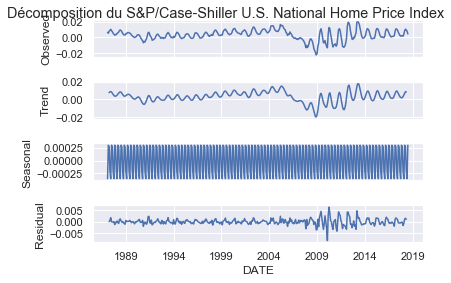

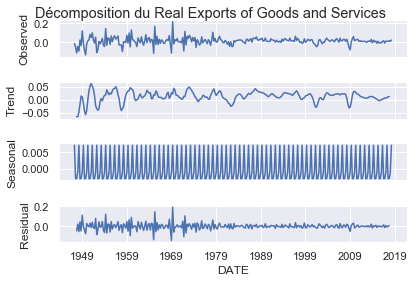

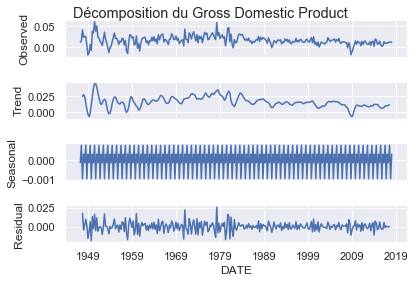

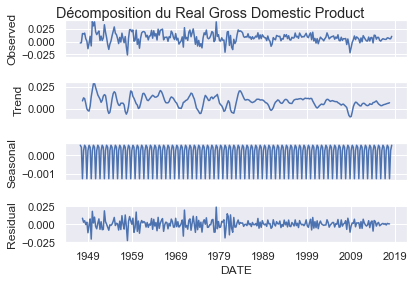

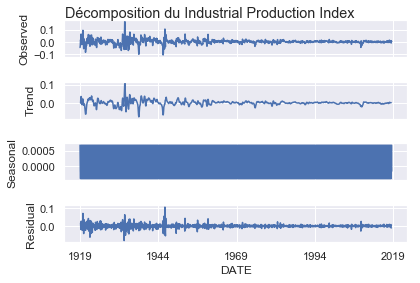

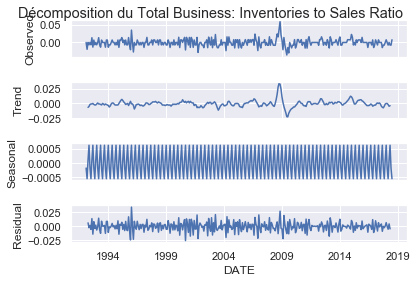

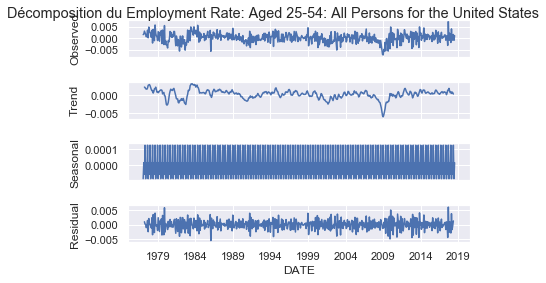

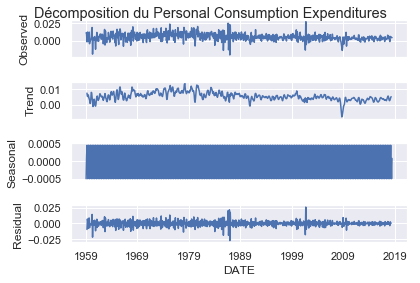

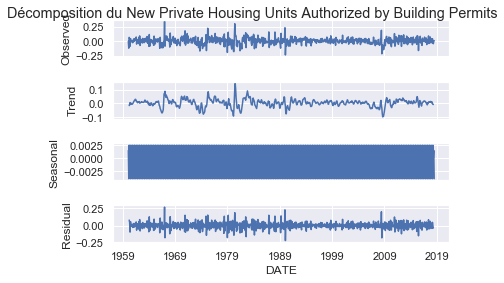

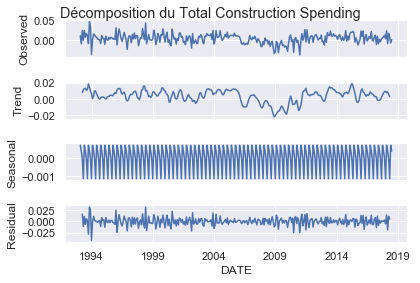

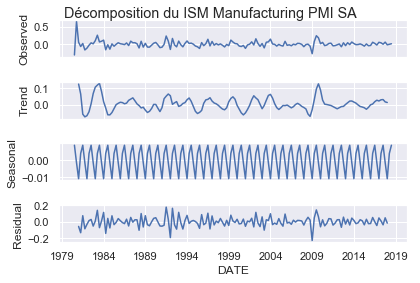

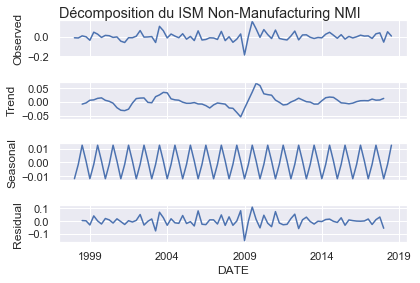

In [360]:
for variable in data_diff.columns:
    
    decompose(data_diff, variable, liste_variables_diff[variable])

## Fit d'un modèle ARIMA sur le GDP

### Sélection de modèles

** Sélection du meilleur modèle - Approche par les autocorrélogrammes **

In [4]:
def autocorrelogramme(dataset, variable, nom_variable):
    
    var = variable
    data = dataset.copy(deep=True)
    X = data[var].dropna()
    
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    ax1 = fig.add_subplot(1,2,1)  
    fig = plot_acf(X, lags=40, title="Autocorrélogramme total du "+ nom_variable, ax=ax1)
    ax1 = fig.add_subplot(1,2,2)
    fig = plot_pacf(X, lags=40, title="Autocorrélogramme partiel du "+ nom_variable, ax=ax1)

#### Sélection du meilleur modèle - Approche par la MSE

In [5]:
# Fonction qui entraine un modèle ARIMA d'un certain ordre sur une base d'entrainement et qui fait des prédictions
# sur une base de test et retourne la MSE du modèle

def evaluate_arima_model(X, arima_order):
    
    # Préparation des datasets train et test 
    train_size = int(len(X) * 0.95)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    p = arima_order[0]
    q = arima_order[2]
    
    # Prédictions
    predictions = list()
    for t in range(len(test)): # on prédit X_t+n à l'aide de X_1 à X_p (vraies données), \hat{X}_p+1, ... , \hat{X}_t+n-1 (prédictions)        
        try: 
            model = ARIMA(history, order=arima_order)
            model_fit = model.fit(disp=0, start_params = [np.mean(history)] + [.1]*p + [.1]*q, transparams=False)
            yhat = model_fit.forecast()[0] # one-step out-of sample forecast
            predictions.append(yhat)
            history.append(test[t]) 
        except:
            continue
    # Calcul de la MSE
    error = mean_squared_error(test, predictions)
    return error

# Fonction qui évalue différents modèles selon les valeurs de (p,d,q) et qui sélectionne le modèle ayant la MSE minimale

def evaluate_models_mse(dataset, variable, p_values, d_values, q_values):
    
    var = variable
    data = dataset.copy(deep=True)
    data = data[var].dropna().astype('float32')
    
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(data, order)*10**5 # Car les MSE sont extrêmement petites, l'affichage pose problème
                    if mse < best_score:
                        best_score, best_cfg = mse, order 
                    print('ARIMA: %s MSE = %f' % (order,mse))
                except:
                    continue
    print('Best ARIMA: %s MSE = %f' % (best_cfg, best_score))

#### Sélection du meilleur modèle - Approche par l'AIC

In [173]:
def evaluate_models_aic(dataset, variable, p_values, d_values, q_values):
    
    var = variable
    data = dataset.copy(deep=True)
    X = data[var].dropna().astype('float32')

    best_aic, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(X, order=order)
                    model_fit = model.fit(disp=0, start_params = [np.mean(X)] + [.1]*p + [.1]*q)
                    aic = model_fit.aic
                    if aic < best_aic:
                        best_aic, best_cfg = aic, order
                    print('ARIMA: %s AIC = %.3f' % (order,aic))
                except:
                    continue
    print('Best ARIMA: %s AIC = %.3f' % (best_cfg, best_aic))
    return best_cfg

#### Données non différenciées

#### Données en rendement

Sélection du meilleur modèle - Application

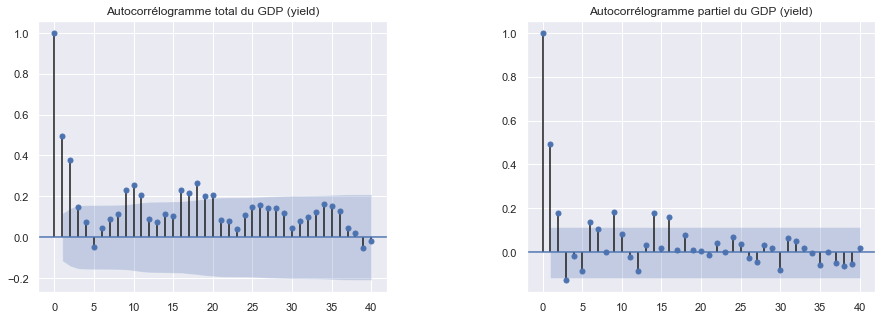

In [337]:
autocorrelogramme(data_diff, "GDP_diff","GDP (yield)")

** Commentaires:** Saisonnalité ?


**Commentaires:** On est tenté de choisir 2 pour l'ordre p et entre 1 et 2 pour l'ordre q.<br><br>

Note : pourquoi il y a un ordre 0 pour l'autocorrélogramme partiel (le prof avait dit que ça n'existait pas).

In [11]:
p_values = [0, 1, 2, 3, 4, 5]
d_values = [0]
q_values = [0, 1, 2, 3, 4, 5]

In [ ]:
evaluate_models_mse(data_diff, "GDPC1_diff", p_values, d_values, q_values)
evaluate_models_aic(data_diff, "GDPC1_diff", p_values, d_values, q_values)

ARIMA: (0, 0, 0) MSE = 1.071693
ARIMA: (0, 0, 1) MSE = 0.823576
ARIMA: (0, 0, 2) MSE = 0.991675
ARIMA: (0, 0, 3) MSE = 0.907618
ARIMA: (0, 0, 4) MSE = 0.897282
ARIMA: (0, 0, 5) MSE = 0.942351
ARIMA: (0, 0, 6) MSE = 0.938672
ARIMA: (0, 0, 7) MSE = 0.933965
ARIMA: (0, 0, 8) MSE = 1.056963
ARIMA: (1, 0, 0) MSE = 0.960813
ARIMA: (1, 0, 1) MSE = 0.761572
ARIMA: (1, 0, 2) MSE = 0.918381
ARIMA: (1, 0, 3) MSE = 0.905254
ARIMA: (1, 0, 4) MSE = 0.998222
ARIMA: (1, 0, 5) MSE = 0.877050
ARIMA: (1, 0, 6) MSE = 0.930267
ARIMA: (1, 0, 7) MSE = 0.947217
ARIMA: (1, 0, 8) MSE = 1.062365
ARIMA: (2, 0, 0) MSE = 0.919477
ARIMA: (2, 0, 1) MSE = 0.861207
ARIMA: (2, 0, 2) MSE = 0.932077
ARIMA: (2, 0, 3) MSE = 1.006433
ARIMA: (2, 0, 4) MSE = 1.128212
ARIMA: (2, 0, 5) MSE = 0.941251
ARIMA: (2, 0, 6) MSE = 1.017485
ARIMA: (2, 0, 7) MSE = 0.890560
ARIMA: (2, 0, 8) MSE = 1.049945
ARIMA: (3, 0, 0) MSE = 0.974913
ARIMA: (3, 0, 1) MSE = 1.014043
ARIMA: (3, 0, 2) MSE = 0.942312
ARIMA: (3, 0, 3) MSE = 0.893612
ARIMA: (

**Commentaires:** L'approche par la MSE et par l'AIC ne sélectionnent pas les mêmes modèles.

### Prédictions

In [103]:
def predicted(dataset, variable, start_index, end_index, order):

    var = variable
    data = dataset.copy(deep=True)
    X = data[var].dropna()

    train = X.loc[X.index[0]:start_index,]
    train.drop(train.tail(1).index,inplace=True) 
    test = X.loc[start_index:end_index,]
    
    historical = [x for x in train]
    predictions = pd.Series(index=test.index)
    
    p = order[0]
    q = order[2]
    
    for t in range(len(test)):
        
        arma_model = ARIMA(historical, order=order)
        arma_model_fit = arma_model.fit(disp=0, start_params = [np.mean(historical)] + [.1]*p + [.1]*q, transparams=False)
        output = arma_model_fit.forecast()
        yhat = output[0]
        predictions.iloc[t] = float(yhat)
        observed = test[t]
        historical.append(observed)
        
    Y = pd.concat([train, predictions]
        
    return predictions, Y

** Commentaires: ** La fonction predicted nous retourne les prédictions d'une variable sur l'horizon souhaitée ainsi qu'une dataframe en deux parties: l'une contenant les vraies valeurs jusqu'au start_index, l'autre partie contenant les valeurs prédites (du start_index jusqu'au end_index). Nous l'utiliserons pour faire tourner nos modèles avec variables exogènes par la suite (cela nous permettra de faire des prédictions out-of-sample.

In [7]:
def in_sample(dataset, variable, nom_variable, order):

    var = variable
    data = dataset.copy(deep=True)
    X = data[var].dropna()
    
    p = order[0]
    q = order[2]
    
    arma_model = ARIMA(X, order).fit(start_params = [.1] + [.1]*p + [.1]*q)

    plt.plot(X, label=nom_variable)
    plt.plot(arma_model.predict(), c="red", label="Predicted " + nom_variable)
    plt.legend()
    plt.title("Prédictions in-sample du "+ nom_variable)
    
def out_of_sample_old(dataset, variable, nom_variable, order):

    var = variable
    data = dataset.copy(deep=True)
    X = data[var].dropna()
    
    train = X[0:int(len(X) * 0.9)]
    test = X[int(len(X) * 0.9):]
    
    start_date = test.index[0]
    end_date = test.index[len(test)-1]
    
    arma_model = ARIMA(train, order).fit()

    plt.plot(test, label = nom_variable)
    plt.plot(arma_model.predict(start=start_date, end=end_date, dynamic=True), color="red",label="Predicted "+ nom_variable)
    plt.legend()
    plt.title("Prédictions out-of-sample du "+ nom_variable)
    
def out_of_sample(dataset, variable, nom_variable, order):

    var = variable
    data = dataset.copy(deep=True)
    X = data[var].dropna()
    
    train = X[0:int(len(X) * 0.95)]
    test = X[int(len(X) * 0.95):]
    
    historical = [x for x in train]
    predictions = list()
    
    p = order[0]
    q = order[2]
    
    for t in range(len(test)):
        
        arma_model = ARIMA(historical, order=order)
        arma_model_fit = arma_model.fit(disp=0, start_params = [np.mean(historical)] + [.1]*p + [.1]*q, transparams=False)
        output = arma_model_fit.forecast()
        yhat = output[0]
        predictions.append(float(yhat))
        observed = test[t]
        historical.append(observed)
        
    plt.plot(test, label = nom_variable)
    plt.plot(test.index, predictions, color="red",label="Predicted "+ nom_variable)
    plt.legend()
    plt.title("Prédictions out-of-sample du "+ nom_variable)    

** Données en rendement **

* ARMA(2,1) & ARMA (2,2)

Prédictions **in-sample**

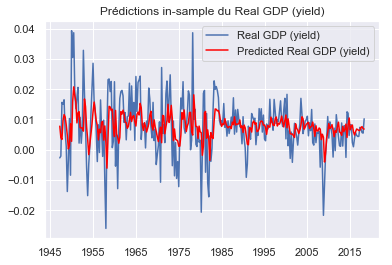

In [6]:
in_sample(data_diff, "GDPC1_diff", "Real GDP (yield)", (2,0,1))

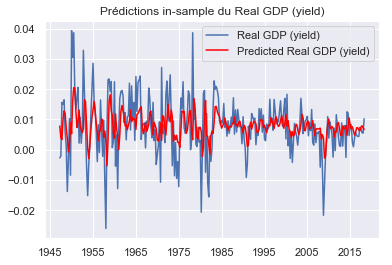

In [320]:
in_sample(data_diff, "GDPC1_diff", "Real GDP (yield)", (2,0,2))

Prédictions **out-of-sample**

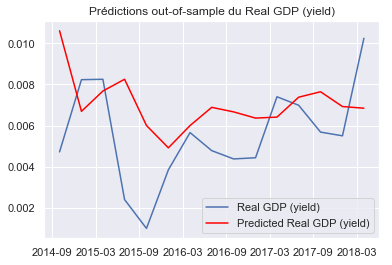

In [44]:
out_of_sample(data_diff, "GDPC1_diff", "Real GDP (yield)", (2,0,1))

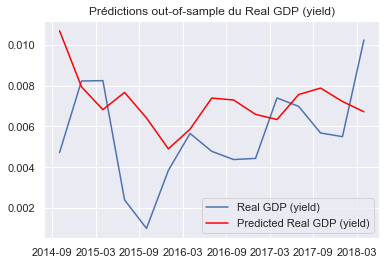

In [129]:
out_of_sample(data_diff, "GDPC1_diff", "Real GDP (yield)", (2,0,2))

** Plot des résidus ** 

In [184]:
def model_arima_residuals(dataset, variable, ordre):
    
    var = variable
    data = dataset.copy(deep=True)
    X = data[var].dropna()

    p = ordre[0]
    q = ordre[2]
    
    arma_model = ARIMA(X, order=ordre)
    arma_model_fit = arma_model.fit(disp=0, transparams=False, start_params = [np.mean(X)] + [.1]*p + [.1]*q)
    
    predictions = arma_model_fit.predict()
    residuals = [X[i]-predictions[i] for i in range(len(X))]
    residuals_df = pd.DataFrame(residuals)
    
    fig = plt.figure(figsize=(12,3))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    plt.subplot(131)
    residuals_df.hist(ax=plt.gca())
    plt.suptitle("Etude des résidus")
    plt.subplot(132)
    residuals_df.plot(kind='kde', ax=plt.gca())
    plt.subplot(133)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.show()

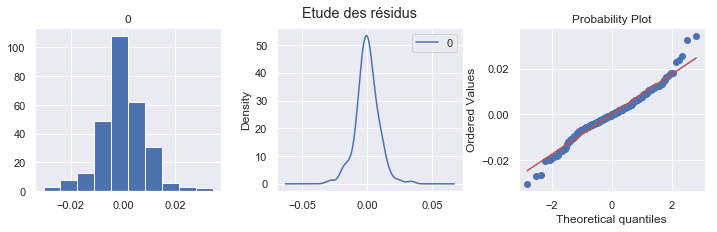

In [185]:
model_arima_residuals(data_diff, "GDPC1_diff", (2,0,1))

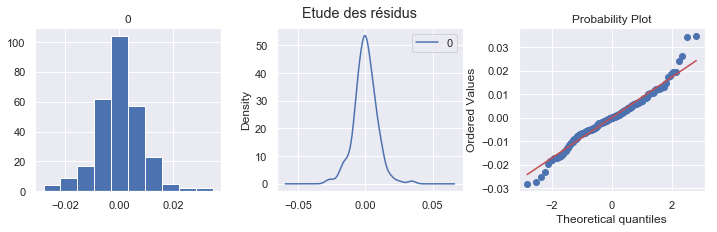

In [186]:
model_arima_residuals(data_diff, "GDPC1_diff", (2,0,2))

* ARMA(0,5)

Prédictions **in-sample**

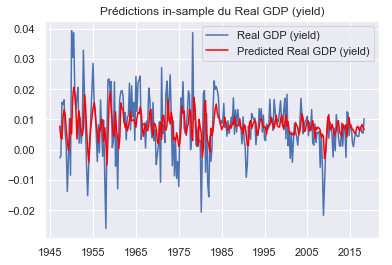

In [78]:
in_sample(data_diff, "GDPC1_diff", "Real GDP (yield)", (0,0,5))

Prédictions **out-of-sample**

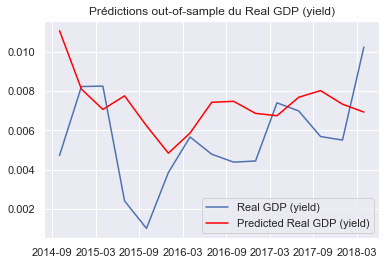

In [8]:
out_of_sample(data_diff, "GDPC1_diff", "Real GDP (yield)", (3,0,2))

** Plot des résidus **

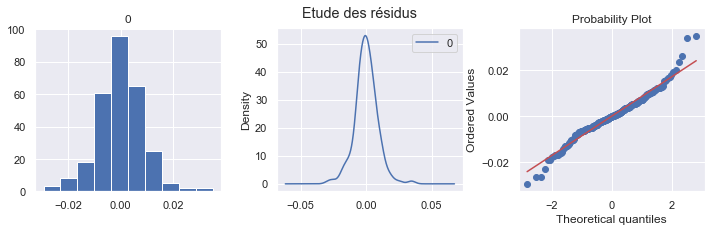

In [187]:
model_arima_residuals(data_diff, "GDPC1_diff", (3,0,2))

* ARMA(3,3)

Prédictions **in-sample**

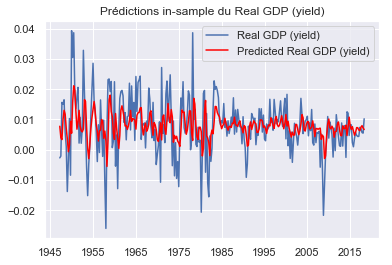

In [70]:
in_sample(data_diff, "GDPC1_diff", "Real GDP (yield)", (3,0,3))

Prédictions **out-of-sample**

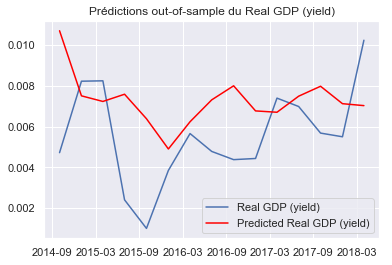

In [9]:
out_of_sample(data_diff, "GDPC1_diff", "Real GDP (yield)", (3,0,3))

** Plot des résidus **

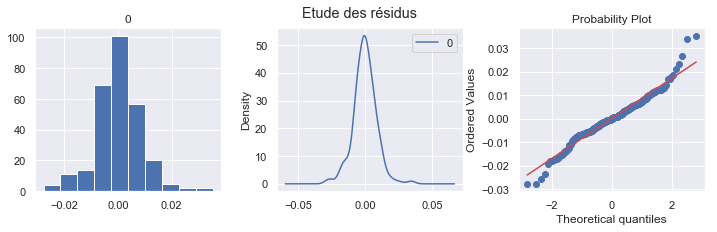

In [188]:
model_arima_residuals(data_diff, "GDPC1_diff", (3,0,3))

## Fit d'un modèle ARIMA sur le INDPRO

In [202]:
def arima_model(dataset, variable, nom_variable, p_values, d_values, q_values):
    
    ordre = evaluate_models_aic(dataset, variable, p_values, d_values, q_values) 
    fig = plt.figure(figsize=(10,7))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.subplot(211)
    in_sample(dataset, variable, nom_variable, ordre)
    plt.subplot(212)
    out_of_sample(dataset, variable, nom_variable, ordre)
    model_arima_residuals(dataset, variable, ordre)
    plt.show()

* Données en rendement

ARIMA: (0, 0, 0) AIC = -6051.261
ARIMA: (0, 0, 1) AIC = -6355.955
ARIMA: (0, 0, 2) AIC = -6394.409
ARIMA: (0, 0, 3) AIC = -6403.845
ARIMA: (0, 0, 4) AIC = -6401.915
ARIMA: (0, 0, 5) AIC = -6403.655
ARIMA: (1, 0, 0) AIC = -6403.008
ARIMA: (1, 0, 1) AIC = -6404.392
ARIMA: (1, 0, 2) AIC = -6402.455
ARIMA: (1, 0, 3) AIC = -6402.073
ARIMA: (1, 0, 4) AIC = -6400.113
ARIMA: (1, 0, 5) AIC = -6406.628
ARIMA: (2, 0, 0) AIC = -6404.515
ARIMA: (2, 0, 1) AIC = -6407.528
ARIMA: (2, 0, 2) AIC = -6400.912
ARIMA: (2, 0, 3) AIC = -6400.038
ARIMA: (2, 0, 4) AIC = -6404.089
ARIMA: (2, 0, 5) AIC = -6407.490
ARIMA: (3, 0, 0) AIC = -6402.642
ARIMA: (3, 0, 1) AIC = -6403.818
ARIMA: (3, 0, 2) AIC = -6403.936
ARIMA: (3, 0, 3) AIC = -6401.876
ARIMA: (3, 0, 4) AIC = -6412.688
ARIMA: (3, 0, 5) AIC = -6426.845
ARIMA: (4, 0, 0) AIC = -6402.172
ARIMA: (4, 0, 1) AIC = -6406.410
ARIMA: (4, 0, 2) AIC = -6400.564
ARIMA: (4, 0, 3) AIC = -6406.678
ARIMA: (4, 0, 4) AIC = -6420.674
ARIMA: (4, 0, 5) AIC = -6424.215
ARIMA: (5,

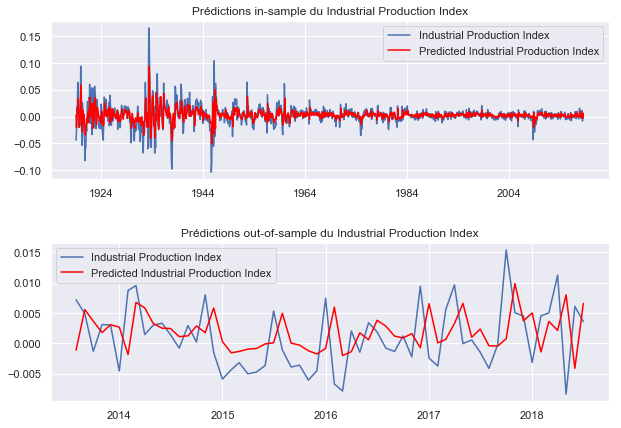

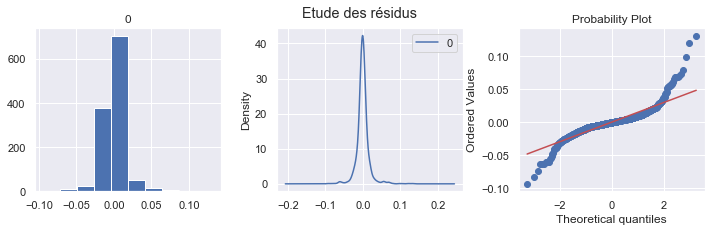

In [203]:
arima_model(data_diff, "INDPRO_diff", "Industrial Production Index (yield)", p_values, d_values, q_values)

In [106]:
predicted_INDPRO = predicted(data_diff_2, "INDPRO_diff", "2014-10-01", "2018-04-01", (5,0,4))[1]

## Fit d'un modèle ARIMA sur le EXPGSC1

* Données en rendement

ARIMA: (0, 0, 0) AIC = -1014.393
ARIMA: (0, 0, 1) AIC = -1012.929
ARIMA: (0, 0, 2) AIC = -1023.515
ARIMA: (0, 0, 3) AIC = -1022.467
ARIMA: (0, 0, 4) AIC = -1022.376
ARIMA: (0, 0, 5) AIC = -1022.009
ARIMA: (1, 0, 0) AIC = -1013.124
ARIMA: (1, 0, 1) AIC = -1013.692
ARIMA: (1, 0, 2) AIC = -1022.043
ARIMA: (1, 0, 3) AIC = -1020.995
ARIMA: (1, 0, 4) AIC = -1021.776
ARIMA: (1, 0, 5) AIC = -1020.307
ARIMA: (2, 0, 0) AIC = -1020.491
ARIMA: (2, 0, 1) AIC = -1018.823
ARIMA: (2, 0, 2) AIC = -1023.713
ARIMA: (2, 0, 3) AIC = -1021.816
ARIMA: (2, 0, 4) AIC = -1019.596
ARIMA: (2, 0, 5) AIC = -1018.179
ARIMA: (3, 0, 0) AIC = -1019.250
ARIMA: (3, 0, 1) AIC = -1017.775
ARIMA: (3, 0, 2) AIC = -1021.836
ARIMA: (3, 0, 3) AIC = -1020.241
ARIMA: (3, 0, 4) AIC = -1017.422
ARIMA: (3, 0, 5) AIC = -1018.900
ARIMA: (4, 0, 0) AIC = -1020.058
ARIMA: (4, 0, 1) AIC = -1020.300
ARIMA: (4, 0, 2) AIC = -1019.055
ARIMA: (4, 0, 4) AIC = -1016.154
ARIMA: (4, 0, 5) AIC = -1016.339
ARIMA: (5, 0, 0) AIC = -1022.182
ARIMA: (5,

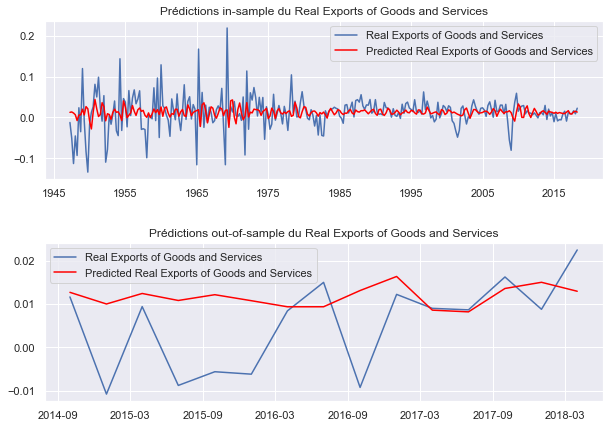

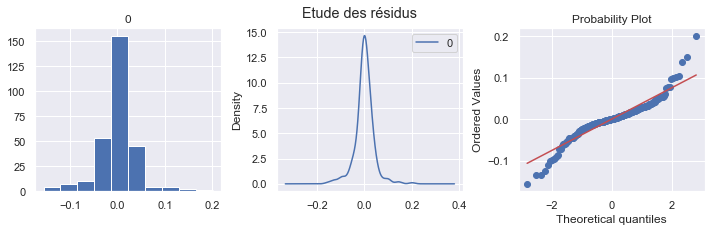

In [204]:
arima_model(data_diff, "EXPGSC1_diff", "Real Exports of Goods and Services (yield)", p_values, d_values, q_values)

In [105]:
predicted_EXPGSC1 = predicted(data_diff_2, "EXPGSC1_diff", "2014-10-01", "2018-04-01", (2,0,2))[1]

## Fit d'un modèle sur le PCE

* Données en rendement

ARIMA: (0, 0, 0) AIC = -5404.437
ARIMA: (0, 0, 1) AIC = -5404.167
ARIMA: (0, 0, 2) AIC = -5409.285
ARIMA: (0, 0, 3) AIC = -5413.086
ARIMA: (0, 0, 4) AIC = -5413.839
ARIMA: (0, 0, 5) AIC = -5418.883
ARIMA: (1, 0, 0) AIC = -5404.510
ARIMA: (1, 0, 1) AIC = -5403.961
ARIMA: (1, 0, 2) AIC = -5477.108
ARIMA: (1, 0, 4) AIC = -5416.211
ARIMA: (1, 0, 5) AIC = -5431.920
ARIMA: (2, 0, 0) AIC = -5408.620
ARIMA: (2, 0, 1) AIC = -5464.562
ARIMA: (2, 0, 2) AIC = -5474.925
ARIMA: (2, 0, 3) AIC = -5479.641
ARIMA: (2, 0, 4) AIC = -5421.305
ARIMA: (2, 0, 5) AIC = -5451.520
ARIMA: (3, 0, 0) AIC = -5417.120
ARIMA: (3, 0, 1) AIC = -5481.491
ARIMA: (3, 0, 2) AIC = -5477.710
ARIMA: (3, 0, 3) AIC = -5457.792
ARIMA: (3, 0, 4) AIC = -5467.820
ARIMA: (3, 0, 5) AIC = -5467.087
ARIMA: (4, 0, 0) AIC = -5422.322
ARIMA: (4, 0, 1) AIC = -5437.922
ARIMA: (4, 0, 3) AIC = -5457.195
ARIMA: (4, 0, 4) AIC = -5469.214
ARIMA: (4, 0, 5) AIC = -5469.772
ARIMA: (5, 0, 0) AIC = -5427.697
ARIMA: (5, 0, 1) AIC = -5455.282
ARIMA: (5,

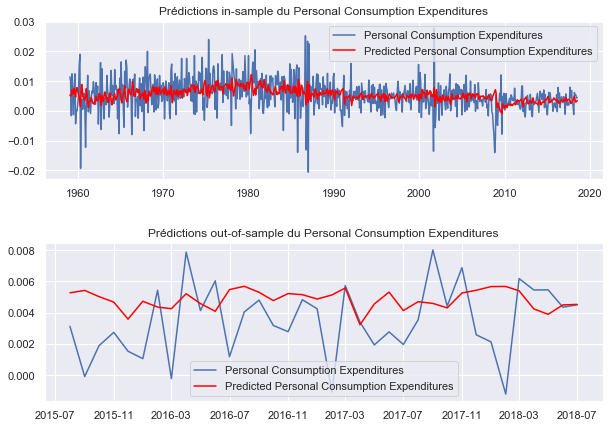

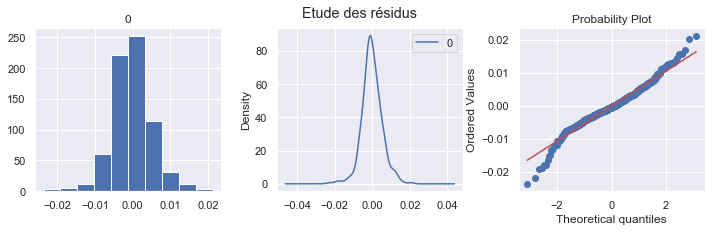

In [205]:
arima_model(data_diff, "PCE_diff", "Personal Consumption Expenditures (yield)", p_values, d_values, q_values)

In [305]:
predicted_PCE = predicted(data_diff_2, "PCE_diff", "2014-10-01", "2018-04-01", (2,0,2))[1]

## Fit d'un modèle sur le PERMIT

* Données en rendement

ARIMA: (0, 0, 0) AIC = -1956.874
ARIMA: (0, 0, 1) AIC = -1958.301
ARIMA: (0, 0, 2) AIC = -1961.978
ARIMA: (0, 0, 3) AIC = -1960.796
ARIMA: (0, 0, 4) AIC = -1959.473
ARIMA: (0, 0, 5) AIC = -1960.233
ARIMA: (1, 0, 0) AIC = -1958.893
ARIMA: (1, 0, 1) AIC = -1958.749
ARIMA: (1, 0, 2) AIC = -1963.615
ARIMA: (1, 0, 3) AIC = -1961.716
ARIMA: (1, 0, 4) AIC = -1960.107
ARIMA: (1, 0, 5) AIC = -1959.270
ARIMA: (2, 0, 0) AIC = -1961.502
ARIMA: (2, 0, 1) AIC = -1963.758
ARIMA: (2, 0, 2) AIC = -1961.763
ARIMA: (2, 0, 3) AIC = -1959.621
ARIMA: (2, 0, 4) AIC = -1960.983
ARIMA: (2, 0, 5) AIC = -1960.242
ARIMA: (3, 0, 0) AIC = -1961.505
ARIMA: (3, 0, 1) AIC = -1961.762
ARIMA: (3, 0, 2) AIC = -1960.401
ARIMA: (3, 0, 3) AIC = -1957.995
ARIMA: (3, 0, 4) AIC = -1956.309
ARIMA: (3, 0, 5) AIC = -1961.663
ARIMA: (4, 0, 0) AIC = -1959.932
ARIMA: (4, 0, 1) AIC = -1959.800
ARIMA: (4, 0, 2) AIC = -1958.015
ARIMA: (4, 0, 3) AIC = -1956.163
ARIMA: (4, 0, 4) AIC = -1955.438
ARIMA: (4, 0, 5) AIC = -1956.986
ARIMA: (5,

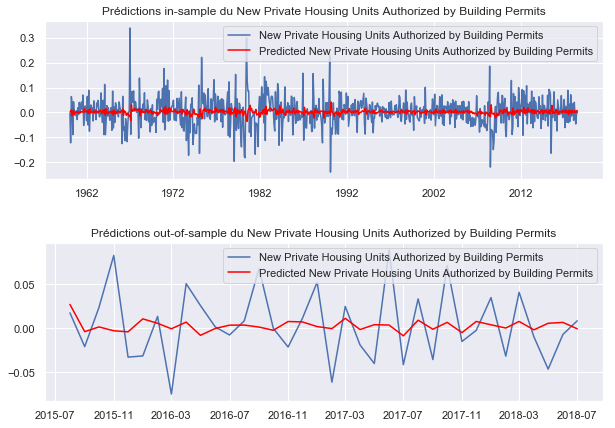

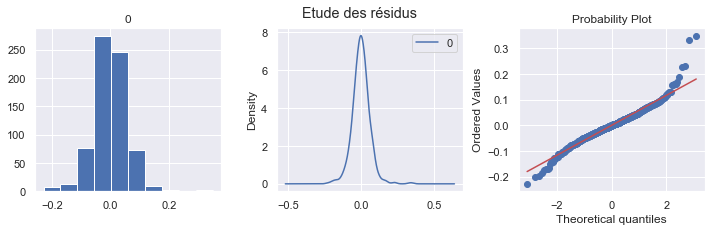

In [206]:
arima_model(data_diff, "PERMIT_diff", "New Private Housing Units Authorized by Building Permits (yield)", p_values, d_values, q_values)

In [306]:
predicted_PERMIT = predicted(data_diff_2, "PERMIT_diff", "2014-10-01", "2018-04-01", (2,0,2))[1]

** Commentaires: ** Il y a des variables plus faciles à prédire que d'autre (INDPRO vs les autres). <br>
On a des prédictions (même in-sample) franchement mauvaises ici. Utilité de prédire ces variables pour les implémenter dans notre modèle ?

## Test d'un modèle ARIMA sur le Real GDP (avec variables exogènes)

* Données en rendement

On travaille sur la BDD où toutes les variables ont été agrégées par trimestre :

In [19]:
data_diff_2 = pd.read_csv("Fed/DataFinal_monthly.csv", parse_dates=["DATE"],index_col="DATE")

In [20]:
# Mettre les données en rendement

# On crée d'abord des les colonnes des variables différenciées

Columns_diff = []

for variable in data_diff_2.columns:
    Columns_diff.append(variable+"_diff")
    data_diff_2[variable+"_diff"] = np.nan
    
# On crée X_diff = (X_{t} - X_{t-1})/(X_{t-1}) sur chaque colonne    
    
data_diff_2 = data_diff_2.copy(deep=True).iloc[:-2,:]  # On retire les deux dernières lignes qui faussent les résultats (problème sur certaines variables)
    
for irow in range(len(data_diff_2)-1):
    for jcol in range(12,data_diff_2.shape[1]):   
        data_diff_2.iloc[irow+1,jcol] = (data_diff_2.iloc[irow+1,jcol-12] - data_diff_2.iloc[irow,jcol-12])/data_diff_2.iloc[irow,jcol-12] # En 0 on n'aura pas la valeur différenciée
        
data_diff_2 = data_diff_2[Columns_diff]

data_diff_2.replace([np.inf, -np.inf], np.nan, inplace=True)

** Sélection du meilleur modèle - Méthode l'AIC **

> Variables exogènes: INDPRO, EXPGSC1 <br>
> Période: 1947-2018 

In [24]:
def evaluate_models_aic_2(dataset, variable, exog, p_values, d_values, q_values):
    
    var = [variable]
    data = dataset.copy(deep=True)
    X = data[var + exog].dropna().astype('float32')

    best_aic, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(X[variable], exog=X[exog], order=order)
                    model_fit = model.fit(disp=0)
                    aic = model_fit.aic
                    if aic < best_aic:
                        best_aic, best_cfg = aic, order
                    print('ARIMA: %s AIC = %.3f' % (order,aic))
                except:
                    continue
    print('Best ARIMA: %s AIC = %.3f' % (best_cfg, best_aic))

In [22]:
exog_1 = ["INDPRO_diff","EXPGSC1_diff"]

In [25]:
evaluate_models_aic_2(data_diff_2, "GDPC1_diff", exog_1, p_values, d_values, q_values)

ARIMA: (0, 0, 0) AIC = -2129.010
ARIMA: (0, 0, 1) AIC = -2129.566
ARIMA: (0, 0, 2) AIC = -2130.282
ARIMA: (0, 0, 3) AIC = -2128.456
ARIMA: (0, 0, 4) AIC = -2126.475
ARIMA: (0, 0, 5) AIC = -2126.853
ARIMA: (1, 0, 0) AIC = -2130.025
ARIMA: (1, 0, 1) AIC = -2131.973
ARIMA: (2, 0, 0) AIC = -2130.084
ARIMA: (2, 0, 1) AIC = -2128.225
ARIMA: (2, 0, 2) AIC = -2119.832
ARIMA: (3, 0, 0) AIC = -2128.251
ARIMA: (3, 0, 1) AIC = -2127.294
ARIMA: (3, 0, 2) AIC = -2123.076
ARIMA: (3, 0, 3) AIC = -2125.988
ARIMA: (4, 0, 0) AIC = -2126.478
ARIMA: (4, 0, 1) AIC = -2124.294
ARIMA: (4, 0, 2) AIC = -2122.711
ARIMA: (4, 0, 3) AIC = -2124.147
ARIMA: (5, 0, 0) AIC = -2128.376
ARIMA: (5, 0, 1) AIC = -2128.206
ARIMA: (5, 0, 2) AIC = -2126.409
ARIMA: (5, 0, 3) AIC = -2124.995
ARIMA: (5, 0, 4) AIC = -2122.907
ARIMA: (5, 0, 5) AIC = -2121.750
Best ARIMA: (1, 0, 1) AIC = -2131.973


Prédictions ** in-sample **

In [26]:
def in_sample_2(dataset, variable, exog, nom_variable, order):

    var = [variable]
    data = dataset.copy(deep=True)
    X = data[var + exog].dropna().astype('float32')
    
    p = order[0]
    q = order[2]
    
    arma_model = ARIMA(X[variable], exog = X[exog], order=order).fit()

    plt.plot(X[variable], label=nom_variable)
    plt.plot(arma_model.predict(), c="red", label="Predicted " + nom_variable)
    plt.legend()
    plt.title("Prédictions in-sample du "+ nom_variable)

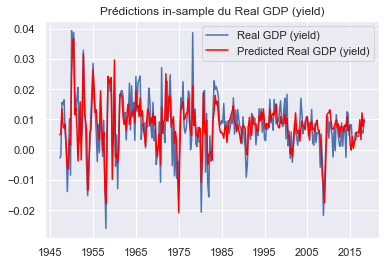

In [434]:
in_sample_2(data_diff_2, "GDPC1_diff", exog_1,"Real GDP (yield)",(1,0,1))

** Commentaires:** La prédiction in-sample est déjà largement meilleure qu'avec un modèle ARMA simple sans variables exogènes, on arrive beaucoup mieux à prédire les pics de la période d'après guerre, mais on a toujours du mal à prédire après les années 60. On arrive également mieux à prédire le pic causé par la crise de 2008 grâce à ce modèle.

Prédictions **out-of-sample**

Il a d'abord fallu prédire les valeurs des variables exogènes individuellement et se servir de ces prédictions pour les injecter dans notre modèle.

In [303]:
def out_of_sample_2(dataset, variable, liste_exog, exog, nom_variable, order):

    var = [variable]
    data = dataset.copy(deep=True)
    X = data[var + liste_exog].dropna()
    
    exog_var = pd.concat(exog, axis=1).dropna()
    train_exog_var = exog_var[0:int(len(X) * 0.95)]
    test_exog_var = exog_var[int(len(X) * 0.95):] # test contient les valeurs prédites
    
    train = X[0:int(len(X) * 0.95)]
    test = X[int(len(X) * 0.95):]
    
    historical = train.iloc[:,0]
    predictions = list()
    observed = list()
    
    p = order[0]
    q = order[2]
    
    for t in range(len(test)):
        
        arma_model = ARIMA(historical, exog = train_exog_var, order=order)
        arma_model_fit = arma_model.fit(disp=0, transparams=False)
        output = arma_model_fit.forecast(exog=test_exog_var.iloc[t,])
        yhat = output[0]
        predictions.append(float(yhat))
        observed = test.iloc[t,0]
        train_exog_var = pd.concat([train_exog_var, test_exog_var.iloc[t:,].head(1)])
        historical = pd.concat([historical,test.iloc[t:,0].head(1)])
        
    plt.plot(test.iloc[:,0], label = nom_variable)
    plt.plot(test.index, predictions, color="red",label="Predicted "+ nom_variable)
    plt.legend()
    plt.title("Prédictions out-of-sample du "+ nom_variable) 

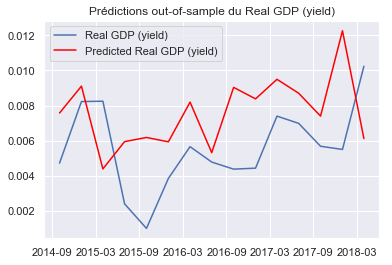

In [314]:
out_of_sample_2(data_diff_2, "GDPC1_diff", exog_1, [predicted_INDPRO, predicted_EXPGSC1] ,"Real GDP (yield)",(1,0,1))

** Commentaires: ** Ici on remarque que la prédiction out-of-sample est trop en avance par rapport à la réalité, on observait le phénomène inverse précédemment sur des prédictions avec des modèles incluant seulement le PIB réel seul:

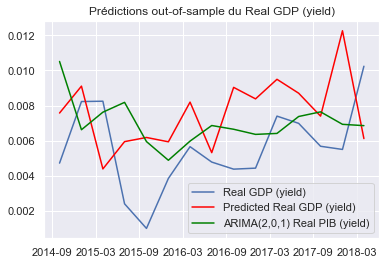

In [316]:
out_of_sample_2(data_diff_2, "GDPC1_diff", exog_1, [predicted_INDPRO, predicted_EXPGSC1] ,"Real GDP (yield)",(1,0,1))
plt.plot(arma_model_2.predict().loc["2014-10-01":"2018-04-01",], c="green", label="ARIMA(2,0,1) Real PIB (yield)")
plt.legend()

> Variables exogènes: INDPRO, EXPGSC1, PCE, PERMIT <br>
> Période: 1960-2018 

In [308]:
exog_2 = ["INDPRO_diff","EXPGSC1_diff","PCE_diff","PERMIT_diff"]

In [309]:
evaluate_models_aic_2(data_diff_2, "GDPC1_diff", exog_2, p_values, d_values, q_values)

ARIMA: (0, 0, 0) AIC = -1784.869
ARIMA: (0, 0, 1) AIC = -1787.148
ARIMA: (0, 0, 2) AIC = -1791.255
ARIMA: (0, 0, 3) AIC = -1789.423
ARIMA: (0, 0, 4) AIC = -1789.053
ARIMA: (0, 0, 5) AIC = -1787.780
ARIMA: (1, 0, 0) AIC = -1788.482
ARIMA: (1, 0, 2) AIC = -1789.777
ARIMA: (2, 0, 0) AIC = -1791.544
ARIMA: (2, 0, 1) AIC = -1793.980
ARIMA: (2, 0, 2) AIC = -1791.132
ARIMA: (3, 0, 0) AIC = -1789.820
ARIMA: (3, 0, 1) AIC = -1793.328
ARIMA: (3, 0, 2) AIC = -1792.242
ARIMA: (3, 0, 3) AIC = -1790.828
ARIMA: (4, 0, 0) AIC = -1790.025
ARIMA: (4, 0, 1) AIC = -1788.837
ARIMA: (4, 0, 2) AIC = -1790.020
ARIMA: (4, 0, 3) AIC = -1790.391
ARIMA: (4, 0, 4) AIC = -1785.161
ARIMA: (5, 0, 0) AIC = -1789.857
ARIMA: (5, 0, 1) AIC = -1791.071
ARIMA: (5, 0, 2) AIC = -1788.475
ARIMA: (5, 0, 3) AIC = -1786.027
ARIMA: (5, 0, 4) AIC = -1784.938
ARIMA: (5, 0, 5) AIC = -1783.730
Best ARIMA: (2, 0, 1) AIC = -1793.980


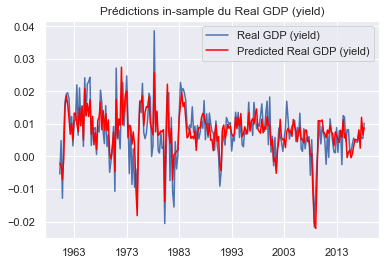

In [437]:
in_sample_2(data_diff_2, "GDPC1_diff",exog_2,"Real GDP (yield)",(2,0,1))

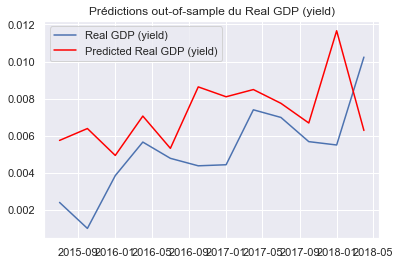

In [310]:
out_of_sample_2(data_diff_2, "GDPC1_diff", ["INDPRO_diff","EXPGSC1_diff","PCE_diff","PERMIT_diff"], [predicted_INDPRO, predicted_EXPGSC1, predicted_PCE, predicted_PERMIT] ,"Real GDP (yield)",(2,0,1))

Comparaison des deux modèles sur la période des deux chocs pétroliers (1973 et 1979) :

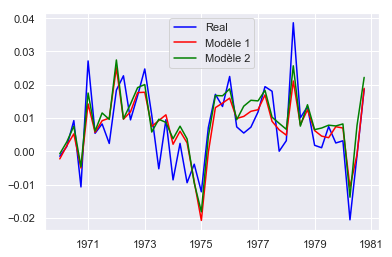

In [462]:
var = ["GDPC1_diff"]
data = data_diff_2.copy(deep=True)
X_1 = data[var + exog_1].dropna().astype('float32')
X_2 = data[var + exog_2].dropna().astype('float32')

arma_model_1 = ARIMA(X_1[var], exog = X_1[exog_1], order=(1,0,1)).fit()
arma_model_2 = ARIMA(X_2[var], exog = X_2[exog_2], order=(2,0,1)).fit()

plt.plot(X_1[var].loc["1970-01-01":"1980-12-01",], c="blue", label="Real")
plt.plot(arma_model_1.predict().loc["1970-01-01":"1980-12-01",], c="red", label="Modèle 1")
plt.plot(arma_model_2.predict().loc["1970-01-01":"1980-12-01",], c="green", label="Modèle 2")
plt.legend()

> Variables exogènes: INDPRO, EXPGSC1, PCE, PERMIT, LREM25TTUSM156S <br>
> Période: 1977-2018 

> Variables exogènes: INDPRO, EXPGSC1, PCE, PERMIT, LREM25TTUSM156S, PX_LAST <br>
> Période: 1980-2018 

> Variables exogènes: INDPRO, EXPGSC1, PCE, PERMIT, LREM25TTUSM156S, PX_LAST, CSUSHPINSA <br>
> Période: 1987-2018 

> Variables exogènes: INDPRO, EXPGSC1, PCE, PERMIT, LREM25TTUSM156S, PX_LAST, CSUSHPINSA, ISRATIO <br>
> Période: 1992-2018 

> Variables exogènes: INDPRO, EXPGSC1, PCE, PERMIT, LREM25TTUSM156S, PX_LAST, CSUSHPINSA, ISRATIO, TTLCONS <br>
> Période: 1993-2018 

> Variables exogènes: INDPRO, EXPGSC1, PCE, PERMIT, LREM25TTUSM156S, PX_LAST, CSUSHPINSA, ISRATIO, TTLCONS, PX_LAST_2 <br>
> Période: 1997-2018 

** Commentaires:** Arbitrage entre nombre de lags et nombre de degré de liberté dans le modèle. Si on veut utiliser toutes les variables, on se retrouve avec un échantillon de très petite taille...<br><br>

**Idée:** Certaines prédictions individuelles étant très mauvaises, il serait peut-être intéressant de prédire les variables par secteur, faire des tests de cointégration ? (i.e. regarder si ces variables évoluent de la même manière). Intuition : Deux variables peuvent être non stationnaires seules, mais le couple peut être stationnaire.